0.9763100931029279 -0.05442174597511797 56.35030898863027 
0.05815726709793089 0.9080384501781524 117.38959393207118 
-5.227266075911349e-07 1.752033291409882e-06 1.0 


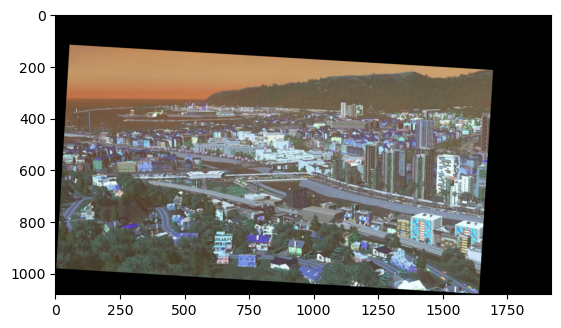

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_sample = cv2.imread("f_0.jpg")
original_gray = cv2.cvtColor(original_sample, cv2.COLOR_BGR2GRAY)

frame = cv2.imread("fm_x.png")
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Use ORB detector to find keypoints and descriptors
orb = cv2.ORB_create()
kpRef, dscRef = orb.detectAndCompute(original_gray, None)
kpImg, dscImg = orb.detectAndCompute(frame_gray, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(dscRef, dscImg)
matches = sorted(matches, key=lambda x: x.distance)

# print(list(map(lambda x: x.distance, matches)))
# print(len(matches))

# max_dist = math.sqrt(frame.shape[0]**2 + frame.shape[1]**2) * 0.10
# filtered_matches = []
# for m in matches:
#     pt1 = np.array(kp1[m.queryIdx].pt)
#     pt2 = np.array(kp2[m.trainIdx].pt)
#
#     dist = np.linalg.norm(pt1 - pt2)
#
#     if dist <= max_dist:
#         filtered_matches.append(m)

# Select good matches
num_good_matches = max(int(len(matches) * 0.2), 12)
good_matches = matches[:num_good_matches]

# Extract location of good matches
src_pts = np.float32([kpRef[m.queryIdx].pt for m in good_matches])
dst_pts = np.float32([kpImg[m.trainIdx].pt for m in good_matches])

# for row in dst_pts:
#     print("[", end="")
#     for x in row:
#         print(x, end=", ")
#     print("],")

# Compute homography matrix
H, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)

for row in H:
    for x in row:
        print(x, end=" ")
    print()

# Warp the image to align with original
height, width = original_sample.shape[:2]
aligned_frame = cv2.warpPerspective(frame, H, (width, height))

plt.imshow(aligned_frame)

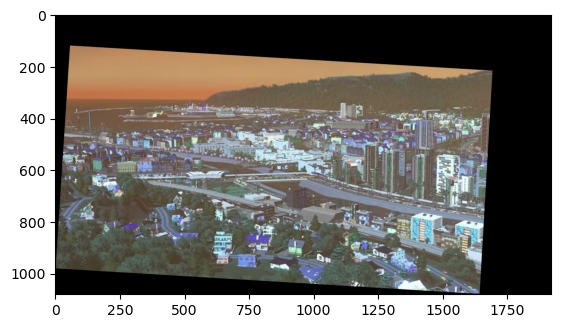

In [23]:
h2 = [
[0.9731798273278528, -0.058685481506507195, 58.08834631007035],
[0.057424918858603555, 0.8991738211712592, 120.68085797188922],
[-9.245639303267449e-7, -0.000003834311174619135, 0.9999999999999999],
]

aligned_frame = cv2.warpPerspective(frame, np.array(h2), (width, height))

plt.imshow(aligned_frame)